# 4) The Normal Probability Model

Vitor Kamada

econometrics.methods@gmail.com

Last updated 7-19-2020

#### 4.1) What is a normal random variable?

A random variable whose probability distribution defines a standard bell-shaped curve.

The notation $X\sim N(\mu,\sigma^2)$ means that the random variable $X$ follows the normal distribution with mean ($\mu$) and variance ($\sigma^2$).

When $Z\sim N(0,1)$, it calls standard normal random variable. 

The formula of the probability density function that generates the graphic below is: 

$$ \phi(z) = {\frac{1}{\sqrt{2 \pi}}} e^{-\frac{1}{2}z^2}, ~~ -\infty < z < \infty $$

C:\Users\acer\anaconda3\envs\book\lib\site-packages\datascience\tables.py:17: MatplotlibDeprecationWarning:

The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.

C:\Users\acer\anaconda3\envs\book\lib\site-packages\datascience\util.py:10: MatplotlibDeprecationWarning:

The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.



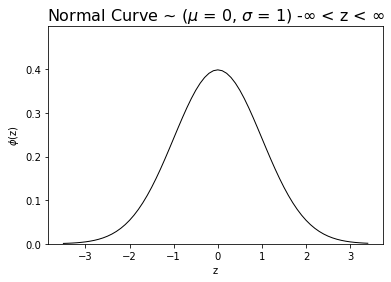

In [ ]:
from datascience import plot_normal_cdf
import matplotlib.pyplot as plots
%matplotlib inline
plot_normal_cdf()

#### 4.2) Calculate the probability of $P(Z \leq 0)$.

The asked probability is given by the yellow area = $\frac{1}{2}$.

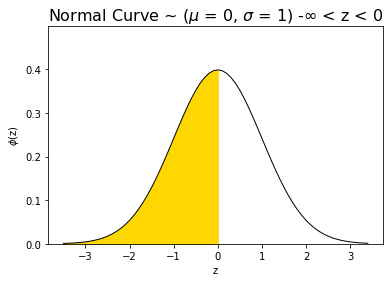

In [ ]:
plot_normal_cdf(0)

In [ ]:
from scipy import stats
stats.norm.cdf(0)

0.5

#### 4.3) Compute the probability of $P(-1 \leq Z \leq 1)$.

The asked probability is given by the yellow area  $\approx0.68$.

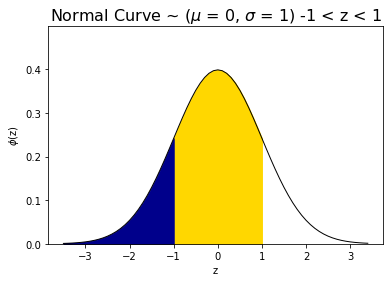

In [ ]:
plot_normal_cdf(1, lbound=-1)

In [ ]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

#### 4.4) Calculate the probability of getting a score 2 standard deviation above the mean in a Test.

The asked probability is given by the yellow area  $\approx 2.2\%$.

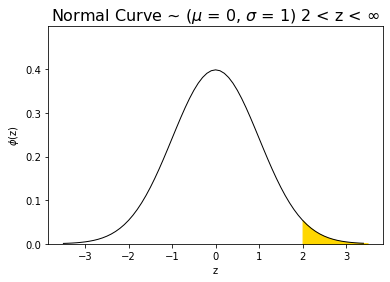

In [ ]:
plot_normal_cdf(lbound=2)

In [ ]:
1 - stats.norm.cdf(2)

0.02275013194817921

#### 4.5) What is z-score?


z-score is the number of standard deviations from the mean:

$$ z=\frac{x-\mu}{\sigma}$$

#### 4.6) What percentage of test-takers scores above 650 in the math component of the SAT?

The math component of the SAT follows normal distribution with a mean 500 and standard deviation of 100:

$X\sim N(\mu = 500,\sigma^2 = 100^2)$

We want to know $P(X>650)$.

Let's convert 650 into z-score:

$$z=\frac{x-\mu}{\sigma}$$

$$=\frac{650-500}{100}$$

$$=\frac{150}{100}$$

$$=1.5$$

In other words, we want to know $P(Z>1.5)$ that is given by the yellow area below $\approx 6.6\%$.


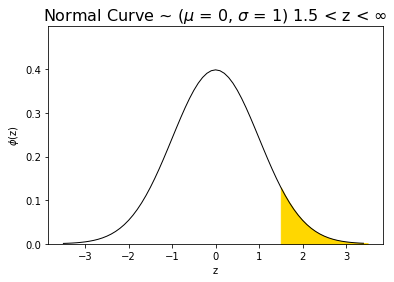

In [ ]:
plot_normal_cdf(lbound=1.5)

In [ ]:
1 - stats.norm.cdf(1.5)

0.06680720126885809

#### 4.7) Compute the z-score that makes $P(Z<z) = 0.2$ true.

$z=-0.84$

In [ ]:
stats.norm(0, 1).ppf(0.2)

-0.8416212335729142

You can do the inverse process and see that $z=-0.84$ returns a probability of 20%. 

In [ ]:
stats.norm.cdf(-0.84)

0.20045419326044966

#### 4.8) What means the statement $X_1$ and $X_2$ are $iid$?

$iid$ means independent and identically distributed. Both random variables are independent and have a common probability distribution. We use the same letter ($X$) to indicate that both random variables have the same distribution. For example:

$$X_1\sim N(\mu_x,\sigma^2_x)$$ 

$$ X_2\sim N(\mu_x,\sigma^2_x)$$

 $$X_1 \perp X_2$$

 If $n$ random variables ($X_1, X_2,...,X_n$) are $iid$, then:

$$E(X_1+ X_2+...+X_n)=n\mu_x$$

$$Var(X_1+ X_2+...+X_n)=n\sigma^2_x$$

$$SD(X_1+ X_2+...+X_n)=\sqrt{n}\sigma_x$$

#### 4.9) In terms of risk, does it matter to buy two shares of Amazon Today vs to buy one share Today and one share Tomorrow?

Let $X$ be the random variable that represents the Amazon stock. 
The variance of buying two shares Today is:

$$ Var(2X)=4\sigma^2_x$$

Let $X_1$ be the random variable that represents the Amazon stock Today, and $X_2$ be the random variable that represents the Amazon stock Tomorrow.
Under $iid$ assumption, the variance of buying one share Today and one share Tomorrow is:

$$ Var(X_1+X_2)=2\sigma^2_x$$

See that independency vanishes the covariance term.

$$ Var(X_1+X_2)=Var(X_1)+Var(X_2)+2Cov(X_1,X_2)$$

$$ =\sigma^2_x + \sigma^2_x +0$$

$$ =2\sigma^2_x$$



If the $iid$ assumption is correct, spreading the investment over two days reduces the variance in half.

#### 4.10) How to use data to check if $iid$ is a realistic assumption about stock prices?

The assumption of iid for random variables is equivalent to the absence of pattern in the data. You could check a graph with daily percentage changes in the price of the stock over time. 

#### 4.11) Why many phenomena in real world can be modeled as normal distribution?

So often, we see the bell-shape in the data, ex: height and weight of any living organism, test score, price of goods, etc.

The reason is formalized by the Central Limit Theorem (CLT):

**The probability distribution of a sum of independent random variables of comparable variance approaches a normal distribution as the number of summed random variables increases.**

Let $Y$ be a sum of random variables ($X_1+ X_2+...+X_n$):

$$ Y = X_1+ X_2+...+X_n$$

If the random variables ($X_1+ X_2+...+X_n$) are independent, and $n$ large enough, then:

$$Y\sim N(\mu,\sigma^{2})$$


Let's toss a coin 50 times and count the number of heads. Let's repeat this process 3000 times (3000 data points). 

In [ ]:
import numpy as np

heads= []
for i in np.arange(3000):
    outcome = np.random.choice(['Head', 'Tail'], 50)
    heads = np.append(heads, np.count_nonzero(outcome == 'Head'))  

See that the histogram has bell shape and most part of data is around the mean 25 Heads.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(x=heads))
fig.show()

## Exercises

1| What is the probability of $P(|Z|\leq  2)$? 

Hint: $|Z|\leq  2$ is equivalent to $-2 \leq Z \leq 2$.

2| What is the z-score that makes $P(Z<z) = 0.5$ true?

3| In terms of expected return, does it matter to buy two shares of Amazon Today vs to buy one share Today and one share Tomorrow? Make assumptions and justify your reasoning, using math.

4| If percentage changes in the value of a stock are $iid$ with mean 0, then how should we predict the change tomorrow if the change today was a 5% increase? How would the prediction change if the value today decreased by 7%?

5| Let $X_1\sim N(\mu_x,5)$  and
$X_2\sim N(\mu_x,5)$ be $iid$ normal random variables.


a) Calculate $Var(2X_1)$.

b) Calculate $Var(X_1+X_2)$.

## Reference

Adhikari, A., DeNero, J. (2020). Computational and Inferential Thinking: The Foundations of Data Science. [Link](https://www.inferentialthinking.com/chapters/intro.html) 

Adhikari, A., Pitman, J. (2020). Probability for Data Science. [Link](http://prob140.org/textbook/README.html) 

Diez, D. M., Barr, C. D., Çetinkaya-Rundel, M. (2014). Introductory Statistics with Randomization and Simulation. [Link](https://www.openintro.org/stat/textbook.php?stat_book=isrs) 

Lau, S., Gonzalez, J., Nolan, D. (2020). Principles and Techniques of Data Science.  [Link](https://www.textbook.ds100.org/intro) 
